## Table of contents

* [Data Gathering](#data-gathering)
* [Data Assessment](#data-assessment)
* [Data Cleaning](#data-cleaning)
* [Data Exploring](#data-exploring)
* [Data Evaluation](#data-evaluation)

## Imports

* Pandas - Dealing with data
* Numpy - C based functions resulting in faster times
* Matplotlib.pyplot - Dealing with visualization
* Seaborn - Dealing with visualization
* Tweepy - Allowing us to interact with twitter's API
* Tiwtter_keys - API keys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

import tweepy

import twitter_keys

consumer_key = twitter_keys.consumer_key
consumer_secret = twitter_keys.consumer_secret
access_token = twitter_keys.access_token
access_secret = twitter_keys.access_secret

%matplotlib inline

dogs = pd.read_csv('./datasets/twitter-archive-enhanced.csv')
predictions = pd.read_csv('./datasets/image-predictions.tsv', delim_whitespace=True)
tweets = pd.read_csv('./tweet_df.csv')

dogs_clean = dogs.copy()
predictions_clean = predictions.copy()
tweets_clean = tweets.copy()

In [77]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

<div id='data-gathering'></div>

## Data Gathering

* Given by Udacity

In [34]:
dogs = pd.read_csv('./datasets/twitter-archive-enhanced.csv')
dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


* Given by Udacity

In [35]:
predictions = pd.read_csv('./datasets/image-predictions.tsv', delim_whitespace=True)
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Itterate through tweet_id to grab additional information

In [85]:
# retweeted
# retweet_count
# favorite_count
# is_quote_status
# favorited

new_df = pd.DataFrame(data=[['one', 'two', 'three', 'four', 'five', 'size']], columns=['tweet_id', 'retweeted', 'retweet_count', 'favorite_count', 'is_quote_status', 'favorited'])
temp = []

In [119]:
# tweet_ids = list(df['tweet_id'])
columns = ['tweet_id', 'retweeted', 'retweet_count', 'favorite_count', 'is_quote_status', 'favorited']
# temp = []
for i in tweet_ids[19:]:
    try:
        response = api.get_status(i, tweet_mode='extended')
        results = response._json
    except:
        continue
    
    # retweeted
    try:
        retweeted = results['retweeted']
    except:
        retweeted = np.nan
    
    # retweet_count
    try:
        retweet_count = results['retweet_count']
    except:
        retweet_count = np.nan
    
    # favorite_count
    try:
        favorite_count = results['favorite_count']
    except:
        favorite_count = np.nan
    
    # is_quote_status
    try:
        is_quote_status = results['is_quote_status']
    except:
        is_quote_status = np.nan
    
    # favorited
    try:
        favorited = results['favorited']
    except:
        favorited = np.nan
        
    temp.append([i, retweeted, retweet_count, favorite_count, is_quote_status, favorited])
    
    temp_df = pd.DataFrame(temp, columns=columns)
    temp_df.to_csv('tweet_df.csv', index=False)
    
    time.sleep(2)

<div id='data-assessment'>

## Data Assessment

In [49]:
dogs

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [50]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [51]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [52]:
tweets = pd.read_csv('tweet_df.csv')
tweets.head()

,tweet_id,retweeted,retweet_count,favorite_count,is_quote_status,favorited
0,892420643555336193,False,8208,37653,False,False
1,892177421306343426,False,6072,32350,False,False
2,891815181378084864,False,4014,24372,False,False
3,891689557279858688,False,8367,40965,False,False
4,891327558926688256,False,9063,39173,False,False


In [12]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 6 columns):
tweet_id           2339 non-null int64
retweeted          2339 non-null bool
retweet_count      2339 non-null int64
favorite_count     2339 non-null int64
is_quote_status    2339 non-null bool
favorited          2339 non-null bool
dtypes: bool(3), int64(3)
memory usage: 61.8 KB


### Quality

#### dogs table

* timestamp is not a datetime type
* Source is unnecessary
* Nulls replaced with something more appropiate, maybe 0
* retweeted_status_timestamp is not a datetime type
* Wrong dtypes for doggo, floofer, pupper, puppo
* Wrong names
* doggo, floofer, pupper, puppo needs only 1 column.
* if not a pupper, puppo then a floofer
* recorded the rating wrong in some cells.
* Missing links for pictures.
* Duplicated links within link to pictures.


#### predictions table

* p1, p2, p3 wrong dtypes

### Tidiness

####  Predictions
* Duplicated picture links for tables 'jpg_url' and 'exanded_url'
* Drop img_num

#### Dogs

* Unnecessary columns for 'in_reply_to_status_id', 'in_reply_to_user_id,' 'retweeted_status_user_id', 'retweeted_status_timestamp', 'retweeted_status_id,'
* tweets needs to be joined with dogs
* Gofundme websites in links for pictures need to be deleted.
* Many rows that are not about dogs need to be deleted

<div id='data-cleaning'></div>

## Data Cleaning

In [60]:
dogs_clean = dogs.copy()
predictions_clean = predictions.copy()
tweets = tweets.copy()

### timestamp is not a datetime type

#### Define

Re-declare timestamp column as original but as type datetime.

#### Code

In [2]:
dogs_clean['timestamp'] = pd.to_datetime(dogs_clean['timestamp'])

#### Test

In [3]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

### Source is unnecessary

#### Define

Drop column, 'source.'

#### Code

In [4]:
dogs_clean.drop(columns='source', inplace=True)

#### Test

In [5]:
'source' in dogs_clean.columns

False

### Nulls replaced with something more appropiate, maybe 0

#### Define

Simply fill nulls as 0.

#### Code

In [6]:
dogs_clean.fillna(0, inplace=True)

#### Test

In [7]:
dogs_clean.isna().sum().sum()

0

### retweeted_status_timestamp is not a datetime type

#### Define

Declare anew as itself turned into datetime.

#### Code

In [8]:
dogs_clean['retweeted_status_timestamp'] = pd.to_datetime(dogs_clean['retweeted_status_timestamp'])

#### Test

In [9]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null float64
in_reply_to_user_id           2356 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
text                          2356 non-null object
retweeted_status_id           2356 non-null float64
retweeted_status_user_id      2356 non-null float64
retweeted_status_timestamp    2356 non-null datetime64[ns, UTC]
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns, UTC](2), float64(4), int64(

### Wrong names

#### Define

Can't actually fix this.

#### Code

### doggo, floofer, pupper, puppo needs only one column

#### Define

Loop through the columns and take the name out of them and put them in a new column called dog_type.

#### Code

In [10]:
f = dogs_clean['name'] == 'None'

e = dogs_clean['rating_numerator'] / dogs_clean['rating_denominator'] < 1

a = dogs_clean['floofer'] == 'None'
b = dogs_clean['pupper'] == 'None'
c = dogs_clean['puppo'] == 'None'
d = dogs_clean['doggo'] == 'None'
index = dogs_clean.loc[a & b & c & d & e & f].index

dogs_clean.drop(index, inplace=True)

In [11]:
def new_dog_type(doggo, floofer, pupper, puppo):
    dog_type = doggo.strip('None') + floofer.strip('None') + pupper.strip('None') + puppo.strip('None')
    if dog_type == '':
        return 'floofer'
    return dog_type

In [12]:
dogs_clean['dog_type'] = dogs_clean.apply(lambda x: new_dog_type(doggo = x['doggo'],
                                                                floofer = x['floofer'],
                                                                pupper = x['pupper'],
                                                                puppo = x['puppo']),
                                                                axis = 1)

In [13]:
dogs_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [14]:
dogs_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,0.0,0.0,1970-01-01 00:00:00+00:00,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,floofer
1,892177421306343426,0.0,0.0,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,0.0,0.0,1970-01-01 00:00:00+00:00,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,floofer
2,891815181378084864,0.0,0.0,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,0.0,0.0,1970-01-01 00:00:00+00:00,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,floofer
3,891689557279858688,0.0,0.0,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,0.0,0.0,1970-01-01 00:00:00+00:00,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,floofer
4,891327558926688256,0.0,0.0,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,0.0,0.0,1970-01-01 00:00:00+00:00,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,floofer


### Wrong dtypes for doggo, floofer, pupper, puppo

#### Define

Change the columns with astype to category.

#### Code

In [15]:
dogs_clean['dog_type'] = dogs_clean['dog_type'].astype('category')

#### Test

In [16]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2222 entries, 0 to 2354
Data columns (total 13 columns):
tweet_id                      2222 non-null int64
in_reply_to_status_id         2222 non-null float64
in_reply_to_user_id           2222 non-null float64
timestamp                     2222 non-null datetime64[ns, UTC]
text                          2222 non-null object
retweeted_status_id           2222 non-null float64
retweeted_status_user_id      2222 non-null float64
retweeted_status_timestamp    2222 non-null datetime64[ns, UTC]
expanded_urls                 2222 non-null object
rating_numerator              2222 non-null int64
rating_denominator            2222 non-null int64
name                          2222 non-null object
dog_type                      2222 non-null category
dtypes: category(1), datetime64[ns, UTC](2), float64(4), int64(3), object(3)
memory usage: 228.2+ KB


### if not a pupper, puppo then a floofer because floofer is the basic of all dogs apparently

#### Define

Done above

#### Code

#### Test

### p1, p2, p3 wrong dtypes

#### Define

Simple declare anew as itself with type as category.

#### Code

In [17]:
predictions_clean[['p1', 'p2', 'p3']] = predictions_clean[['p1', 'p2', 'p3']].astype('category')

#### Test

In [18]:
predictions_clean[['p1', 'p2', 'p3']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
p1    2075 non-null category
p2    2075 non-null category
p3    2075 non-null category
dtypes: category(3)
memory usage: 71.5 KB


### Drop jpg urls

#### Define
Simply drop the columns with inplace set to true.

#### Code

In [19]:
predictions_clean.drop(columns='jpg_url', inplace=True)

In [20]:
predictions_clean.head()

,tweet_id,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Test

## Drop img_num column

#### Define

Drop with inplace.

#### Code

In [21]:
predictions_clean.drop(columns='img_num', inplace=True)

#### Test

In [22]:
predictions_clean.head()

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Unnecessary columns for 'in_reply_to_status_id', 'in_reply_to_user_id,' 'retweeted_status_user_id', 'retweeted_status_timestamp', 'retweeted_status_id,'

#### Define

After review, just going to drop them.

#### Code

In [23]:
dogs_clean.drop(columns=['in_reply_to_status_id',
                         'in_reply_to_user_id',
                         'retweeted_status_user_id',
                         'retweeted_status_timestamp',
                         'retweeted_status_id'],
                inplace=True)

#### Test

In [24]:
dogs_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,floofer
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,floofer
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,floofer
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,floofer
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,floofer


### Move 'jpg_urls' in place of 'extended_urls'

#### Define

Ended up just dropping jpg_urls.

#### Code

#### Test

### tweets needs to be joined with dogs

#### Define

Will merge on tweets_id.

#### Code

In [25]:
dogs_tweets_clean = dogs_clean.merge(tweets_clean, on='tweet_id')

#### Test

In [26]:
dogs_tweets_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweeted,retweet_count,favorite_count,is_quote_status,favorited
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,floofer,False,8208,37653,False,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,floofer,False,6072,32350,False,False
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,floofer,False,4014,24372,False,False
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,floofer,False,8367,40965,False,False
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,floofer,False,9063,39173,False,False


recorded the rating wrong in some cells.
Missing links for pictures.

### Recorded the rating wrong in some cells Bella specifically

#### Define

Grab Bella's tweet id and switch the numerator to 13.5.

#### Code

#### Bella 883482846933004288

In [30]:
dogs_clean.loc[dogs_clean['tweet_id'] == 883482846933004288, 'rating_numerator'] = 13.5

#### Test

In [44]:
dogs_clean.loc[dogs_clean['tweet_id'] == 883482846933004288]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
45,883482846933004288,2017-07-08 00:28:19+00:00,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,floofer


### Missing links for pictures

#### Define

After some effort, not actually able to get the missing links for pictures.

#### Code

#### Test

### Duplicated links within cells

#### Define

First need to create a mask in order to isolate the duplicated links. Next create a function that will split them and compare. Lastly, using the mask, set those into the clean dataframe.

#### Code

In [37]:
mask = dogs_clean['expanded_urls'].map(lambda x: str(x).count('http') >= 2)

In [38]:
def delete_duplicated_link(url):
    """
    Splits url into two parts allowing it to be checked for equality.
    If they are not equal; return the original as to not lose data.
    
    Parameters
    ----------
    url : string
    
    Returns
    -------
    url | a | b : string
        Depends on if they are same, not a url, or twitter.
        
    """
    try:
        a, b = url.split(',')[:2]
    except:
        return url
    
    if a == b: return a
    
    return (b if 'twitter' in b else a)

In [39]:
test = dogs_clean[mask]['expanded_urls'].map(delete_duplicated_link)

In [40]:
dogs_clean.loc[mask, 'expanded_urls'] = test

#### Test

In [41]:
(dogs_clean['expanded_urls'].map(lambda x: str(x).count('http') >= 2)).sum()

0

### Gofundme Links needs to be deleted

#### Define

Already done above.

#### Code

#### Test

In [104]:
(dogs_clean['expanded_urls'].map(lambda x: 'gofund' in str(x))).sum()

0

## Saving Clean Datasets

In [45]:
dogs_tweets_clean.to_csv('twitter_archive_master.csv', index=False)
predictions_clean.to_csv('twitter_archive_second.csv', index=False)

In [46]:
# If you need to import them
dogs_tweets_clean = pd.read_csv('twitter_archive_master.csv')
predictions_clean = pd.read_csv('twitter_archive_second.csv')

<div id='data-exploring'></div>

## Data Exploring

In [47]:
dogs_tweets_clean['favorited'].sum()

0

* It wiould seem that none of these dogs were favorited...

In [48]:
dogs_tweets_clean['favorite_count'].sum()

18084062

* Then looking at the favorite count, we can see that over 18 million people favorited it! Not sure on the difference between favorited and favorite count.

In [49]:
dogs_tweets_clean['retweet_count'].sum()

6637050

* These tweets in total were retweeted over 6 million times!

In [50]:
dogs_tweets_clean['retweeted'].sum()

0

* We were trying to avoid grabbing any tweets that were retweeted and it shows that we were successful.

* It also seems a lot of people will send in a picture of their pet blending in with the rug, which people do not seem to appreciate for some reason. Or pictures that are not even of dogs.

<div id='data-evaluation'></div>

## Data Evaluation

In [63]:
predictions_clean

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


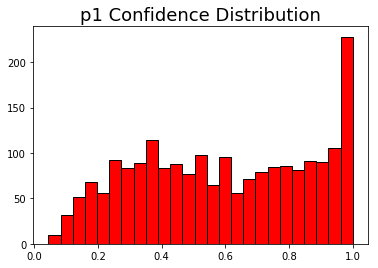

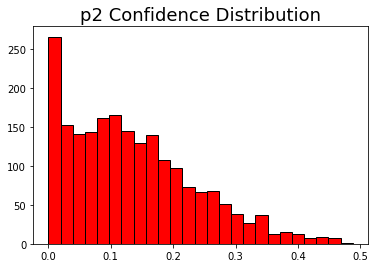

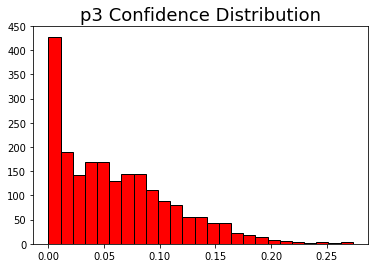

In [101]:
for i in range(1, 4):
    x = predictions_clean[f'p{i}_conf']
    y = dogs_tweets_clean['rating_denominator']

    # Plotting configuration
    plt.figure()
    plt.hist(x,
             color='red',
             bins=25,
             edgecolor='black');
    plt.title(f'p{i} Confidence Distribution', size=18);